# Определение прибыльного тарифного плана для оператора связи

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


## Подготовка данных

In [74]:
# импорт библиотек
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [75]:
# считывание данных
try:
    users_data = pd.read_csv('users.csv', sep=",")
    internet_data = pd.read_csv('internet.csv', sep=",")
    messages_data = pd.read_csv('messages.csv', sep=",")
    calls_data = pd.read_csv('calls.csv', sep=",")
    tariffs_data = pd.read_csv('tariffs.csv', sep=",")
except:
    users_data = pd.read_csv('/datasets/users.csv', sep=",")
    internet_data = pd.read_csv('/datasets/internet.csv', sep=",")
    messages_data = pd.read_csv('/datasets/messages.csv', sep=",")
    calls_data = pd.read_csv('/datasets/calls.csv', sep=",")
    tariffs_data = pd.read_csv('/datasets/tariffs.csv', sep=",")

In [76]:
# функция для первичного анализа данных
def data_info(data):
    print('ОБЩАЯ ИНФОРМАЦИЯ', sep='\n')
    print(data.info()) 
    print('ПРОПУСКИ В ДАННЫХ', '', data.isna().sum(), '', sep='\n')
    print('ПЕРВЫЕ 5 ЗАПИСЕЙ', sep='\n')
    display(data.head(5))
    

In [77]:
# информация по датасету users_data
data_info(users_data)

ОБЩАЯ ИНФОРМАЦИЯ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
ПРОПУСКИ В ДАННЫХ

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

ПЕРВЫЕ 5 ЗАПИСЕЙ


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [78]:
# информация по датасету internet_data
data_info(internet_data)

ОБЩАЯ ИНФОРМАЦИЯ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
ПРОПУСКИ В ДАННЫХ

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

ПЕРВЫЕ 5 ЗАПИСЕЙ


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [79]:
# информация по датасету messages_data
data_info(messages_data)

ОБЩАЯ ИНФОРМАЦИЯ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
ПРОПУСКИ В ДАННЫХ

id              0
message_date    0
user_id         0
dtype: int64

ПЕРВЫЕ 5 ЗАПИСЕЙ


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [80]:
# информация по датасету calls_data
data_info(calls_data)

ОБЩАЯ ИНФОРМАЦИЯ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
ПРОПУСКИ В ДАННЫХ

id           0
call_date    0
duration     0
user_id      0
dtype: int64

ПЕРВЫЕ 5 ЗАПИСЕЙ


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [81]:
# информация по датасету tariffs_data
data_info(tariffs_data)

ОБЩАЯ ИНФОРМАЦИЯ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
ПРОПУСКИ В ДАННЫХ

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

ПЕРВЫЕ 5 ЗАПИСЕЙ


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Данные не имеют пропусков, кроме колонки churn_date, которая отвечает за дату прекращения тарифа.

Предварительный просмотр показал следующие проблемы:
1. Убрать лишний столбец Unnamed 0 из internet_data;
2. Поменять формат данных в колонках отвечающих за время с object на datetime в колонках ['churn_date', 'reg_date', 'session_date', 'message_date', 'call_date']
3. Добавить стоимость тарифа в tariffs_data.

## Предподготовка данных

Приведите данные к нужным типам;

Найдите и исправьте ошибки в данных, если они есть.
Поясните, какие ошибки вы нашли и как их исправили. 
В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Посчитайте для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;

количество отправленных сообщений по месяцам;

объем израсходованного интернет-трафика по месяцам;

In [82]:
# убираем лишний столбец 'Unnamed: 0'
internet_data = internet_data.drop('Unnamed: 0', axis=1)

In [83]:
#меняем тип данных в колонках времени
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d', errors='ignore')
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d', errors='ignore')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d', errors='ignore')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d', errors='ignore')
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d', errors='ignore')

In [84]:
# переименовываем колонку тарифа для дальнейшей комфортной работы
tariffs_data = tariffs_data.rename(columns={'tariff_name' : 'tariff'})
# добавляем колонку с ценой тарифа
tariffs_data['tariff_price'] = tariffs_data['tariff']
tariffs_data['tariff_price'] = tariffs_data['tariff_price'].replace({'ultra': 1950, 'smart': 550})

In [85]:
# небольшая подготовительная работа с internet_data. 
# Мёрджим пользовательские данные и данные по тарифам, чтобы в последствии было проще считать

internet_data = internet_data.merge(users_data).drop(columns=['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=0)

internet_data = internet_data.merge(tariffs_data, on='tariff', validate='m:1')
internet_data['tariff_price'] = internet_data['tariff'].replace({'ultra': 1950, 'smart': 550})

### Вывод

Привели данные в "рабочий вид": изменили формат времени в каждом датасете, удалили лишние столбцы и переименовали название тарифов на их стоимость, для комфортной дальнейшей работы

## Анализ данных

*Посчитайте для каждого пользователя:*
*количество сделанных звонков и израсходованных минут разговора по месяцам;*

*количество отправленных сообщений по месяцам;*

*объем израсходованного интернет-трафика по месяцам;*


In [86]:
# округлили значения длины и поменил тип с float на int
calls_data['duration'] = np.ceil(calls_data['duration']).astype('int')

In [87]:
# выделяем месяц из call_date, messages_data, internet_data
calls_data['month'] = calls_data['call_date'].dt.month
messages_data['month'] = messages_data['message_date'].dt.month
internet_data['month'] = internet_data['session_date'].dt.month

In [88]:
# количество звонков каждого пользователя по месяцам и продолжительность разговоров
calls_data_grouped_v1 = calls_data.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_data_grouped_v1

count      sum
              duration duration
user_id month                  
1000    5           22      159
        6           43      172
        7           47      340
        8           52      408
        9           58      466
...                ...      ...
1498    10          41      247
1499    9            9       70
        10          68      449
        11          74      612
        12          69      492

[3174 rows x 2 columns]

In [89]:
# количество отправленых смс по месяцам
messages_data_grouped_v1 = messages_data.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])
messages_data_grouped_v1

count
                 id
user_id month      
1000    5        22
        6        60
        7        75
        8        81
        9        57
...             ...
1498    10       42
1499    9        11
        10       48
        11       59
        12       66

[2717 rows x 1 columns]

In [90]:
internet_data

,id,mb_used,session_date,user_id,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_price,month
0,1000_0,112.95,2018-11-25,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950,11
1,1000_1,1052.81,2018-09-07,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950,9
2,1000_2,1197.26,2018-06-25,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950,6
3,1000_3,550.27,2018-08-22,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950,8
4,1000_4,302.56,2018-09-24,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,Пермь,smart,50,15360,500,550,200,3,3,550,10
149392,1499_153,490.13,2018-12-14,1499,Пермь,smart,50,15360,500,550,200,3,3,550,12
149393,1499_154,0.00,2018-10-27,1499,Пермь,smart,50,15360,500,550,200,3,3,550,10
149394,1499_155,1246.32,2018-11-26,1499,Пермь,smart,50,15360,500,550,200,3,3,550,11


In [91]:
# сводная таблица израсходанного трафика каждым пользователем по месяцам
internet_data_grouped_v1 = (internet_data.pivot_table(index=['user_id', 'month'], 
                                                      values=['mb_used', 'city', 'tariff',
                                                               'messages_included', 'mb_per_month_included', 
                                                               'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 
                                                               'rub_per_message', 'rub_per_minute', 'tariff_price'], 
                                                      aggfunc={'mb_used':'sum', 
                                                               'messages_included':'median',
                                                              'mb_per_month_included':'median', 
                                                               'minutes_included':'median', 
                                                               'rub_monthly_fee':'median', 
                                                               'rub_per_gb':'median', 
                                                               'rub_per_message':'median', 
                                                               'rub_per_minute':'median', 
                                                               'tariff_price':'median'
                                                              }))
# считаем количество потраченных мегабайт в месяц
internet_data_grouped_v1['mb_used'] = np.ceil(internet_data_grouped_v1['mb_used'] / 1024) * 1024
internet_data_grouped_v1

mb_per_month_included  mb_used  messages_included  \
user_id month                                                      
1000    5                      30720   3072.0               1000   
        6                      30720  23552.0               1000   
        7                      30720  14336.0               1000   
        8                      30720  14336.0               1000   
        9                      30720  15360.0               1000   
...                              ...      ...                ...   
1498    10                     15360  21504.0                 50   
1499    9                      15360   2048.0                 50   
        10                     15360  18432.0                 50   
        11                     15360  18432.0                 50   
        12                     15360  13312.0                 50   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
user_id month                                                                   
1000    5                  3000             1950         150                1   
        6                  3000             1950         150                1   
        7                  3000             1950         150                1   
        8                  3000             1950         150                1   
        9                  3000             1950         150                1   
...                         ...              ...         ...              ...   
1498    10                  500              550         200                3   
1499    9                   500              550         200                3   
        10                  500              550         200                3   
        11                  500              550         200                3   
        12                  500              550         200                3   

               rub_per_minute  tariff_price  
user_id month                                
1000    5                   1          1950  
        6                   1          1950  
        7                   1          1950  
        8                   1          1950  
        9                   1          1950  
...                       ...           ...  
1498    10                  3           550  
1499    9                   3           550  
        10                  3           550  
        11                  3           550  
        12                  3           550  

[3203 rows x 9 columns]

In [92]:
# данные до объединения
internet_data_grouped_v1.shape

(3203, 9)

In [93]:
# собираем все данные в одну таблицу + данные по тарифу
aggregate_income = internet_data_grouped_v1.merge(calls_data_grouped_v1[[(  'sum', 'duration')]], on=['user_id', 'month'], how='outer', validate=('m:m'))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [94]:
# добавляем данные расхода смс
aggregate_income = aggregate_income.merge(messages_data_grouped_v1[[('count', 'id')]], on=['user_id', 'month'], how='outer',  validate=('m:m'))

In [95]:
# данные после объединения
aggregate_income.shape

(3214, 11)

In [96]:
# переименовваем столбцы для комфортного использования
aggregate_income = aggregate_income.rename(columns={('sum', 'duration'):'calls_duration', ('count', 'id'):'message_count'})

In [97]:
# считаем все превышения сверх тарифа
aggregate_income['internet_income'] = aggregate_income['mb_per_month_included'] - aggregate_income['mb_used']
aggregate_income['calls_income'] = aggregate_income['minutes_included'] - aggregate_income['calls_duration']
aggregate_income['message_income'] = aggregate_income['messages_included'] - aggregate_income['message_count']

In [98]:
# считаем полученную прибыль по каждому параметру
aggregate_income['internet_income'] = (abs(aggregate_income.query('internet_income < 0')['internet_income'] / 1024) * aggregate_income['rub_per_gb']).fillna(0)
aggregate_income['calls_income'] = (abs(aggregate_income.query('calls_income < 0')['calls_income']) * aggregate_income['rub_per_minute']).fillna(0)
aggregate_income['message_income'] = (abs(aggregate_income.query('message_income < 0')['message_income']) * aggregate_income['rub_per_message']).fillna(0)

In [99]:
# считаем суммарную прибыль
aggregate_income['total_income'] = (aggregate_income['internet_income'] + 
                                    aggregate_income['calls_income'] + 
                                    aggregate_income['message_income'] +
                                   aggregate_income['tariff_price'])

In [100]:
# зная особенность данных и то что не в каждый месяч клиенты пользуются какими либо услугами связи
aggregate_income.isna().sum()

mb_per_month_included     11
mb_used                   11
messages_included         11
minutes_included          11
rub_monthly_fee           11
rub_per_gb                11
rub_per_message           11
rub_per_minute            11
tariff_price              11
calls_duration            40
message_count            497
internet_income            0
calls_income               0
message_income             0
total_income              11
dtype: int64

In [101]:
# у нас идёт огромная потеря данных в колонки 'message_count' т.к. 
# смс отправляются редко и мы можем принять отсутствующие значения за 0
aggregate_income['message_count'] = aggregate_income['message_count'].fillna(0)


In [102]:
#проверка
aggregate_income.isna().sum()

mb_per_month_included    11
mb_used                  11
messages_included        11
minutes_included         11
rub_monthly_fee          11
rub_per_gb               11
rub_per_message          11
rub_per_minute           11
tariff_price             11
calls_duration           40
message_count             0
internet_income           0
calls_income              0
message_income            0
total_income             11
dtype: int64

In [103]:
# мы можем позволить себе убрать пустые данные т.к. 
# они составляют менее 1% от общего числа данных (удалили 40 записей из 3203)
aggregate_income = aggregate_income.dropna(axis=0)

In [104]:
# итоговая таблица
aggregate_income

mb_per_month_included  mb_used  messages_included  \
user_id month                                                      
1000    5                    30720.0   3072.0             1000.0   
        6                    30720.0  23552.0             1000.0   
        7                    30720.0  14336.0             1000.0   
        8                    30720.0  14336.0             1000.0   
        9                    30720.0  15360.0             1000.0   
...                              ...      ...                ...   
1498    10                   15360.0  21504.0               50.0   
1499    9                    15360.0   2048.0               50.0   
        10                   15360.0  18432.0               50.0   
        11                   15360.0  18432.0               50.0   
        12                   15360.0  13312.0               50.0   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
user_id month                                                                   
1000    5                3000.0           1950.0       150.0              1.0   
        6                3000.0           1950.0       150.0              1.0   
        7                3000.0           1950.0       150.0              1.0   
        8                3000.0           1950.0       150.0              1.0   
        9                3000.0           1950.0       150.0              1.0   
...                         ...              ...         ...              ...   
1498    10                500.0            550.0       200.0              3.0   
1499    9                 500.0            550.0       200.0              3.0   
        10                500.0            550.0       200.0              3.0   
        11                500.0            550.0       200.0              3.0   
        12                500.0            550.0       200.0              3.0   

               rub_per_minute  tariff_price  calls_duration  message_count  \
user_id month                                                                
1000    5                 1.0        1950.0           159.0           22.0   
        6                 1.0        1950.0           172.0           60.0   
        7                 1.0        1950.0           340.0           75.0   
        8                 1.0        1950.0           408.0           81.0   
        9                 1.0        1950.0           466.0           57.0   
...                       ...           ...             ...            ...   
1498    10                3.0         550.0           247.0           42.0   
1499    9                 3.0         550.0            70.0           11.0   
        10                3.0         550.0           449.0           48.0   
        11                3.0         550.0           612.0           59.0   
        12                3.0         550.0           492.0           66.0   

               internet_income  calls_income  message_income  total_income  
user_id month                                                               
1000    5                  0.0           0.0             0.0        1950.0  
        6                  0.0           0.0             0.0        1950.0  
        7                  0.0           0.0             0.0        1950.0  
        8                  0.0           0.0             0.0        1950.0  
        9                  0.0           0.0             0.0        1950.0  
...                        ...           ...             ...           ...  
1498    10              1200.0           0.0             0.0        1750.0  
1499    9                  0.0           0.0             0.0         550.0  
        10               600.0           0.0             0.0        1150.0  
        11               600.0         336.0            27.0        1513.0  
        12                 0.0           0.0            48.0         598.0  

[3163 rows x 15 columns]

## Описание поведение клиентов оператора

*Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.*

### Анализ Calls

In [105]:
calls_data_smart = aggregate_income.query('tariff_price == 550.0')[['calls_duration']] # данные по тарифу smart
calls_data_ultra = aggregate_income.query('tariff_price == 1950.0')[['calls_duration']] # данные по тарифу ultra

In [106]:
# описание данных звонков тарифа смарт
calls_data_smart.describe()

,calls_duration
count,2222.000000
mean,419.229073
std,189.206167
min,0.000000
25%,285.000000
50%,423.000000
75%,545.750000
max,1435.000000


In [107]:
# описание данных звонков тарифа ультра
calls_data_ultra.describe()

,calls_duration
count,941.000000
mean,548.890542
std,306.619353
min,0.000000
25%,315.000000
50%,531.000000
75%,760.000000
max,1673.000000


In [108]:
# считаем дисперсию для звонков по тарифам
var_calls_smart = np.var(calls_data_smart['calls_duration'], ddof=1)
print(f"Дисперсия звонков  клиентов тарифа smart: {var_calls_smart}")

var_calls_ultra = np.var(calls_data_ultra['calls_duration'], ddof=1, dtype=None)
print(f"Дисперсия звонков  клиентов тарифа ultra: {var_calls_ultra}")

Дисперсия звонков  клиентов тарифа smart: 35798.973616339645
Дисперсия звонков  клиентов тарифа ultra: 94015.42736789733


In [109]:
# считаем стандартное отклонение для звонков по тарифам
std_smart_deviation_calls = np.sqrt(var_calls_smart)
print(f"Стандартное отклонение звонков  клиентов тарифа smart: {std_smart_deviation_calls}")

std_ultra_deviation_calls = np.sqrt(var_calls_ultra)
print(f"Стандартное отклонение звонков  клиентов тарифа ultra: {std_ultra_deviation_calls}")

Стандартное отклонение звонков  клиентов тарифа smart: 189.2061669617025
Стандартное отклонение звонков  клиентов тарифа ultra: 306.61935256584394


In [110]:
# применяем правило трёх сигм для определения диапозона
adv_calls_smart_min = round(calls_data_smart['calls_duration'].mean() - 3*std_smart_deviation_calls, 2)
adv_calls_smart_max = round(3*std_smart_deviation_calls + calls_data_smart['calls_duration'].mean(), 2)

print(f'Данные по звонкам для тарифа smart находятся в диапозоне от {adv_calls_smart_min} до {adv_calls_smart_max}')


adv_calls_ultra_min = round(calls_data_ultra['calls_duration'].mean() - 3*std_ultra_deviation_calls, 2)
adv_calls_ultra_max = round(3*std_ultra_deviation_calls + calls_data_ultra['calls_duration'].mean(), 2)

print(f'Данные по звонкам для тарифа ultra находятся в диапозоне от {adv_calls_ultra_min} до {adv_calls_ultra_max}')

Данные по звонкам для тарифа smart находятся в диапозоне от -148.39 до 986.85
Данные по звонкам для тарифа ultra находятся в диапозоне от -370.97 до 1468.75


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


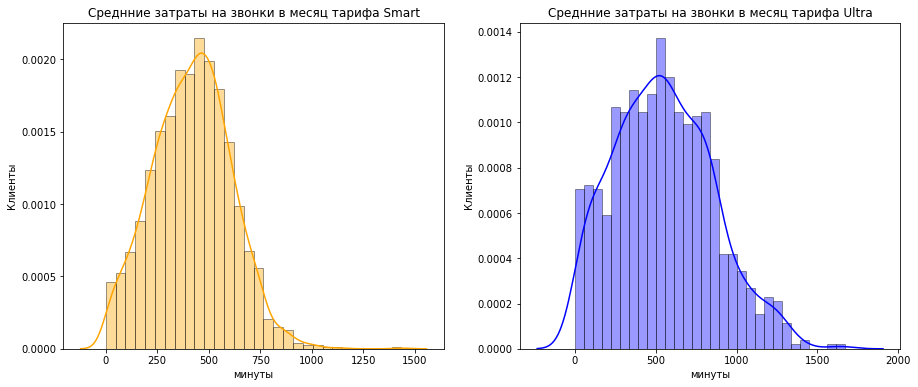

In [111]:
# строим графики для визуальной оценки данных
fig = plt.figure(figsize=(15, 6))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.distplot(calls_data_smart['calls_duration'],  
                   kde=True,
                   hist_kws={'edgecolor':'black'},
                   bins=30, 
                   color = 'orange')            
ax1.set(xlabel ='минуты', ylabel = 'Клиенты', title ='Среднние затраты на звонки в месяц тарифа Smart')


ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(calls_data_ultra['calls_duration'],
                   kde=True,
                   bins=30,
                   hist_kws={'edgecolor':'black'},
                   color = 'blue')
ax2.set(xlabel ='минуты', ylabel = 'Клиенты', title ='Среднние затраты на звонки в месяц тарифа Ultra')
plt.show()

### Вывод по calls

*Обе гистограммы имеют нормальное распределение, а их средняя и медианы координально не отличаются друг от друга*

<font color='red'>smart</font>:

медиана: 423  средняя: 419.2
 
<font color='red'>ultra</font>:

медиана: 531  средняя: 548.9

### Анализ messages

In [112]:
messages_data_smart = aggregate_income.query('tariff_price == 550.0')[['message_count']] # данные по тарифу smart
messages_data_ultra = aggregate_income.query('tariff_price == 1950.0')[['message_count']] # данные по тарифу ultra

In [113]:
# описание данных звонков тарифа смарт
messages_data_smart.describe()

,message_count
count,2222.000000
mean,33.410891
std,28.257434
min,0.000000
25%,10.000000
50%,28.000000
75%,51.000000
max,143.000000


In [114]:
# описание данных звонков тарифа ультра
messages_data_ultra.describe()

,message_count
count,941.000000
mean,49.260361
std,47.066174
min,0.000000
25%,5.000000
50%,40.000000
75%,79.000000
max,224.000000


In [115]:
# считаем дисперсию для сообщений по тарифам
var_messages_smart = np.var(messages_data_smart['message_count'], ddof=1)
print(f"Дисперсия сообщений  клиентов тарифа smart: {var_messages_smart}")

var_messages_ultra = np.var(messages_data_ultra['message_count'], ddof=1, dtype=None)
print(f"Дисперсия сообщений  клиентов тарифа ultra: {var_messages_ultra}")

Дисперсия сообщений  клиентов тарифа smart: 798.4826008264934
Дисперсия сообщений  клиентов тарифа ultra: 2215.224693060807


In [116]:
# считаем стандартное отклонение для сообщений по тарифам
std_smart_deviation_messages = np.sqrt(var_messages_smart)
print(f"Стандартное отклонение звонков  клиентов тарифа smart: {std_smart_deviation_messages}")

std_ultra_deviation_messages = np.sqrt(var_messages_ultra)
print(f"Стандартное отклонение звонков  клиентов тарифа ultra: {std_ultra_deviation_messages}")

Стандартное отклонение звонков  клиентов тарифа smart: 28.25743443461372
Стандартное отклонение звонков  клиентов тарифа ultra: 47.06617355448398


In [117]:
# применяем правило трёх сигм для определения диапозона
adv_messages_smart_min = round(messages_data_smart['message_count'].mean() - 3*std_smart_deviation_messages, 2)
adv_messages_smart_max = round(3*std_smart_deviation_messages + messages_data_smart['message_count'].mean(), 2)

print(f'Данные по звонкам для тарифа smart находятся в диапозоне от {adv_messages_smart_min} до {adv_messages_smart_max}')


adv_messages_ultra_min = round(messages_data_ultra['message_count'].mean() - 3*std_ultra_deviation_messages, 2)
adv_messages_ultra_max = round(3*std_ultra_deviation_messages + messages_data_ultra['message_count'].mean(), 2)

print(f'Данные по звонкам для тарифа ultra находятся в диапозоне от {adv_messages_ultra_min} до {adv_messages_ultra_max}')

Данные по звонкам для тарифа smart находятся в диапозоне от -51.36 до 118.18
Данные по звонкам для тарифа ultra находятся в диапозоне от -91.94 до 190.46


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


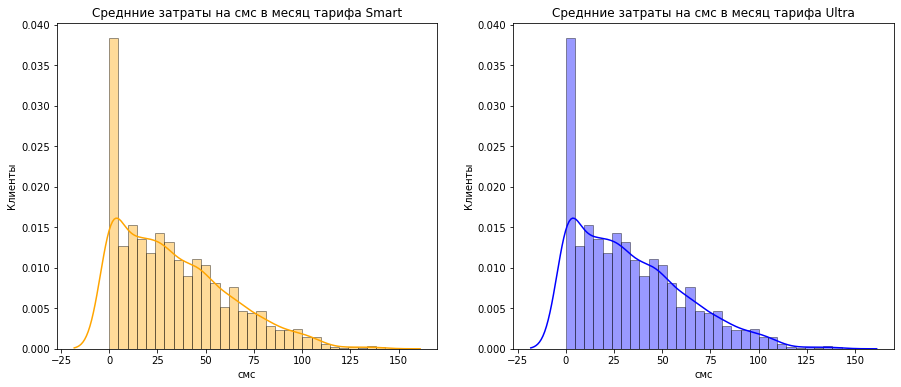

In [118]:
# строим графики для визуальной оценки данных
fig = plt.figure(figsize=(15, 6))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.distplot(messages_data_smart['message_count'],  
                   kde=True,
                   hist_kws={'edgecolor':'black'},
                   bins=30, 
                   color = 'orange')            
ax1.set(xlabel ='смс', ylabel = 'Клиенты', title ='Среднние затраты на смс в месяц тарифа Smart')


ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(messages_data_smart['message_count'],
                   kde=True,
                   bins=30,
                   hist_kws={'edgecolor':'black'},
                   color = 'blue')
ax2.set(xlabel ='смс', ylabel = 'Клиенты', title ='Среднние затраты на смс в месяц тарифа Ultra')
plt.show()

### Вывод по Messages

*обе гистограммы имеют четкое распределение со скосом вправо. Данные в полном порядке, об этом говоит минимальная разница в среднем и медиане*

<font color='red'>smart</font>:

медиана: 28  средняя: 33.4
 
<font color='red'>ultra</font>:

медиана: 40  средняя: 49

### Анализ internet

In [119]:
# округляем до гигабайт
internet_data_smart = aggregate_income.query('tariff_price == 550.0')[['mb_used']] / 1024 # данные по тарифу smart
internet_data_ultra = aggregate_income.query('tariff_price == 1950.0')[['mb_used']] / 1024 # данные по тарифу ultra

In [120]:
# описание данных трафика тарифа смарт
internet_data_smart.describe()

,mb_used
count,2222.000000
mean,16.337084
std,5.743447
min,0.000000
25%,13.000000
50%,17.000000
75%,20.000000
max,38.000000


In [121]:
# описание данных трафика тарифа ультра
internet_data_ultra.describe()

,mb_used
count,941.000000
mean,19.695005
std,9.735407
min,0.000000
25%,12.000000
50%,19.000000
75%,27.000000
max,49.000000


In [122]:
# считаем дисперсию для трафика по тарифам
var_internet_smart = np.var(internet_data_smart['mb_used'], ddof=1)
print(f"Дисперсия трафика клиентов тарифа smart: {var_internet_smart}")

var_internet_ultra = np.var(internet_data_ultra['mb_used'], ddof=1, dtype=None)
print(f"Дисперсия трафика клиентов тарифа ultra: {var_internet_ultra}")

Дисперсия трафика клиентов тарифа smart: 32.987178884480116
Дисперсия трафика клиентов тарифа ultra: 94.77815587763136


In [123]:
# считаем стандартное отклонение для трафика по тарифам
std_smart_deviation_internet = np.sqrt(var_internet_smart)
print(f"Стандартное отклонение трафика клиентов тарифа smart: {std_smart_deviation_internet}")

std_ultra_deviation_internet = np.sqrt(var_internet_ultra)
print(f"Стандартное отклонение трафика клиентов тарифа ultra: {std_ultra_deviation_internet}")

Стандартное отклонение трафика клиентов тарифа smart: 5.743446603258371
Стандартное отклонение трафика клиентов тарифа ultra: 9.73540732982608


In [124]:
# применяем правило трёх сигм для определения диапозона
adv_internet_smart_min = round(internet_data_smart['mb_used'].mean() - 3*std_smart_deviation_internet, 2)
adv_internet_smart_max = round(3*std_smart_deviation_internet + internet_data_smart['mb_used'].mean(), 2)

print(f'Данные по трафику для тарифа smart находятся в диапозоне от {adv_internet_smart_min} до {adv_internet_smart_max}')


adv_internet_ultra_min = round(internet_data_ultra['mb_used'].mean() - 3*std_ultra_deviation_internet, 2)
adv_internet_ultra_max = round(3*std_ultra_deviation_internet + internet_data_ultra['mb_used'].mean(), 2)

print(f'Данные по трафику для тарифа ultra находятся в диапозоне от {adv_internet_ultra_min} до {adv_internet_ultra_max}')

Данные по трафику для тарифа smart находятся в диапозоне от -0.89 до 33.57
Данные по трафику для тарифа ultra находятся в диапозоне от -9.51 до 48.9


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


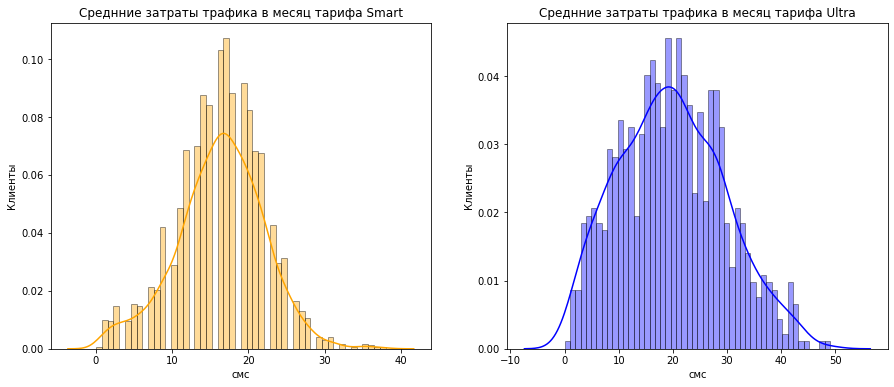

In [125]:
# строим графики для визуальной оценки данных
fig = plt.figure(figsize=(15, 6))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.distplot(internet_data_smart['mb_used'],  
                   kde=True,
                   hist_kws={'edgecolor':'black'},
                   bins=50, 
                   color = 'orange')            
ax1.set(xlabel ='смс', ylabel = 'Клиенты', title ='Среднние затраты трафика в месяц тарифа Smart')


ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(internet_data_ultra['mb_used'],
                   kde=True,
                   bins=50,
                   hist_kws={'edgecolor':'black'},
                   color = 'blue')
ax2.set(xlabel ='смс', ylabel = 'Клиенты', title ='Среднние затраты трафика в месяц тарифа Ultra')
plt.show()

### Выводы по internet

*обе гистограммы имеют нормальное распределение. Данные в полном порядке, об этом говоит минимальная разница в среднем и медиане*

<font color='red'>smart</font>:

медиана: 17  средняя: 16.3
 
<font color='red'>ultra</font>:

медиана: 19  средняя: 19.7

In [126]:
smart_total_income = (aggregate_income.query('tariff_price == 550.0')['total_income']) # smart
ultra_total_income = (aggregate_income.query('tariff_price == 1950.0')['total_income']) # ultra

In [127]:
# средняя выручка клиента тарифа smart
smart_total_income.mean()

1291.2245724572458

In [128]:
# средняя выручка клиента тарифа ultra
ultra_total_income.mean()

2072.2635494155156

### Общий вывод

*Проанализировав данные и сравнив итоговую стоимость каждой составляющей тарифного плана можно увидеть, что нисмотря на то что пользователи покупают тариф под свои нужды, можно заметить что пользователи тарифа смарт переплачивают сверх тарифа в 74.6% случаях, в своб очередь как пользователи тарифа ультра всего в 13.6%.*

*Общий итог который следует из этого всего, что в случае, если компания решит проводить рекламную компанию того или иного тарифа ей стоит выбрать для этого именно Smart, т.к. количество пользователей использующих тариф Smart в 2,5 раза больше, 351 пользователь против 149 тарифа ultra, так ещё и две трети клиентов smart переплачивают за предоставляемые услуги, что безусловно идёт на руку компании.*

*Но также стоит заметить что средняя выручка с одного клиента тарифа ultra примерно на 700р больше чем у тарифа smart. Я не знаю какие затраты несёт профайдер за предоставляемые "беспратные" лимиты и не могу сравнить истинную прибыль того или иного тарифа, оставлю это решение за директорами*

## Проверка гипотез

1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:

как вы формулировали нулевую и альтернативную гипотезы;

какой критерий использовали для проверки гипотез и почему.


### 1 гипотеза: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

Исходя из текста задания нам интересно узнать КАК ИМЕННО отличается выручка у двух тарифов, в большую или меньшую сторону - не имеет значения, потому применяе двустороннюю гипотезу для двух ГС

Следовательно:

Задаём нулевую гипотезу H0 - доход тарифов Smart и Ultra не различаются;

Альтернативную гипотезу гипотезу H1 - доход тарифов Smart и Ultra различаются.

In [129]:
alpha = .01
# задаём критический уровень теоритической значимости, 
# если p-value будет превышать это значения значит теорию можно будет отвергнуть

In [130]:
smart_income = (aggregate_income.query('tariff_price == 550.0')['total_income']) # smart
ultra_income = (aggregate_income.query('tariff_price == 1950.0')['total_income']) # ultra

In [131]:
results_test = st.ttest_ind(smart_income,
                         ultra_income
)

print('p-значение: ', results_test.pvalue)

if results_test.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.24470859092255e-154
Отвергаем нулевую гипотезу


*Получилась слишком мизерная вероятнось подтверждения гипотезы, поэтому мы ее отвергаем*

### 2 гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

В этой гипотезе так нас интересует отличие в целом, значит снова применяем двустороннюю гипотезу

Нулевая гипотеза H0 - средняя выручка в Москве приблизительно равна выручки в других регионах;

Альтернативная гипотеза H1 - средняя выручка в Москве отличается от выручки в других регионах;

In [132]:
# подготовим данные
city_aggregate_income = aggregate_income.reset_index().merge(users_data[['user_id', 'city']], on='user_id', validate='m:1')

In [133]:
# выделяем датасеты в переменные для работы со статистической значимостью
Moscow_income = city_aggregate_income.query('city == "Москва"')['total_income']
Other_area_income = city_aggregate_income.query('city != "Москва"')['total_income']

In [134]:
# проверяем двустороннюю гипотезу на выборках
results_test_2 = st.ttest_ind(Moscow_income,
                         Other_area_income
)

print('p-значение: ', results_test_2.pvalue)

if results_test_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.44090823896943043
Не получилось отвергнуть нулевую гипотезу


*Вероятность подтверждения гипотезы 44,1%, что не даёт с уверенностью заявить о том что затраты жителей Москвы координально отличаются от затрат по другим регионам*

## Общий вывод

### Предобработка данных

Большая часть данных была в отличном состоянии, отсутствовали дубликаты и пропуски там где их быть не должно. Основной частью предобработки стало:

1. Убран лишний столбец Unnamed 0 из internet_data;
2. Поменяли формат данных в колонках отвечающих за время с object на datetime в колонках ['churn_date', 'reg_date', 'session_date', 'message_date', 'call_date']
3. Добавить стоимость тарифа в tariffs_data.


### Анализ данных

*В среднем количество затреченных ресурсов: минут на звонок, трафика и СМС у пользователей обоих тарифов примерно одинаковое, но основным нюансом является тот факт что в погоне за "экономией" пользователи тарифа Smart переплачивают гораздо чаще, в свою очередь как пользователи тарифа Ultra редко превышают выделенные их тарифу лимиты, что позволяет компании экономить на трафике здесь и получать большую прибыль в тарифе Smart*

### Проверка гипотез



1 Гипотеза

*Нам не удалось принять нулевую гипотезу о том, что прибыль с тарифов Smart и Ultra не различаются и это закономерность, такой вывод можно сделать взглянув на данные потребление. Они практически идентичны, но учитывая то что пользователи Smart гораздо чаще превышают лимиты следовательно и выручка с них идёт больше, что и подтверждает нашу альтернативную теорию о различности дохода*

2 Гипотеза

*Зная что потребление среди всех пользователей вне зависимости от тарифа распределено примерно одинаков мы делаем соответствующие выводы о том, что Москва не приносит больше денег чем другие регионы и подтверждаем это сравнением двух генеральных совокупностей*